<a href="https://colab.research.google.com/github/CajunCompiler/SYBCA-SEM4/blob/main/hwassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importing libraries

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#importing libraries

2. Loading dataset

In [14]:
#loading the data set
df = pd.read_csv("/mnt/heart.csv")

3. Basic Data Inspection

#### `df.head()`:  check (did it load correctly?)

In [15]:
display(df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#### `df.shape`: number of rows & columns

In [16]:
print(df.shape)

(1025, 14)


#### `df.info()`: data types + missing values

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


#### `df.describe()`: statistical overview (mean, min, max, etc.)

In [18]:
display(df.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


4. Check if null values are present
#### `df.isnull().sum()`: check for null values

In [19]:
display(df.isnull().sum())
print("No missing values were found in the dataset.")

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


No missing values were found in the dataset.


5. Sepereate features and target

In [20]:
X = df.drop("target", axis=1)
y = df["target"]


6. Identify categorical vs numerical features

In [21]:
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
numerical_features = [col for col in X.columns if col not in categorical_features]


7. Encode categorical variables
(We use one hot encoding here )

In [22]:
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)


8. Train-test split

In [38]:
from sklearn.model_selection import train_test_split

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


9. Feature scaling

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#EDA
EXPLORATORY DATA ANALYSIS

 1. Import EDA libraries

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


2. Target variable distribution

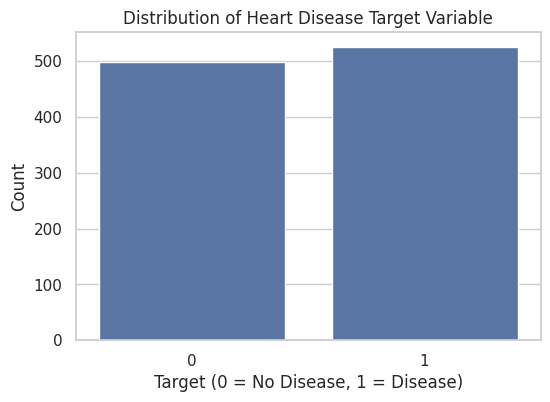

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Distribution of Heart Disease Target Variable")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.show()
#The dataset shows a relatively balanced distribution between patients with and without heart disease, which is beneficial for training classification models.


3. Age vs Heart Disease

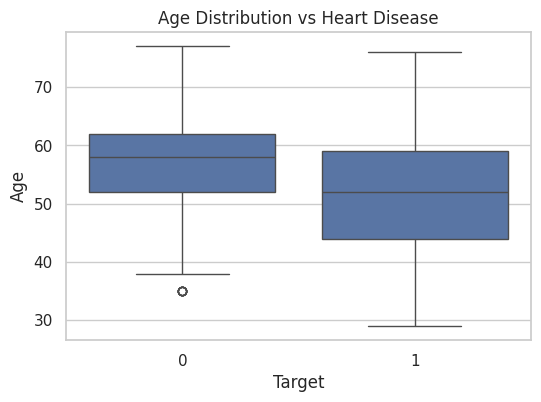

In [30]:
plt.figure(figsize=(6,4))
sns.boxplot(x=y, y=df["age"])
plt.title("Age Distribution vs Heart Disease")
plt.xlabel("Target")
plt.ylabel("Age")
plt.show()
#Patients diagnosed with heart disease tend to have a higher median age compared to those without heart disease, indicating age as an important risk factor.

4. Cholesterol vs Heart Disease

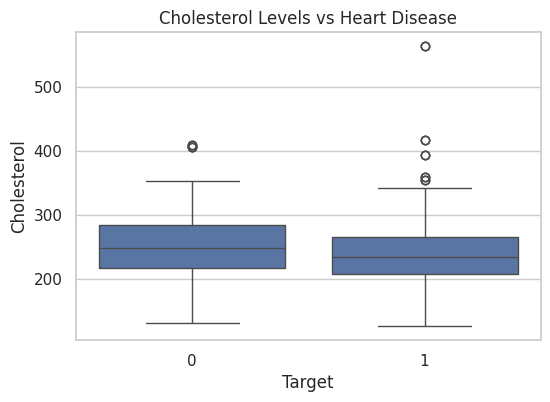

In [35]:
plt.figure(figsize=(6,4))
sns.boxplot(x=y, y=df["chol"])
plt.title("Cholesterol Levels vs Heart Disease")
plt.xlabel("Target")
plt.ylabel("Cholesterol")
plt.show()

#Cholesterol levels do not show a strong separation between patients with and without heart disease, indicating that total cholesterol alone may not be a reliable discriminator in this dataset.


5. Maximum Heart Rate vs Target

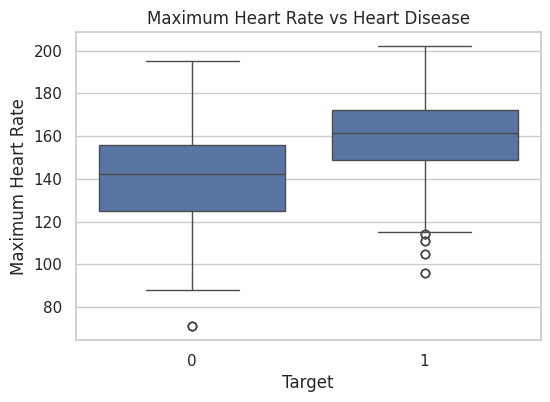

In [36]:
plt.figure(figsize=(6,4))
sns.boxplot(x=y, y=df["thalach"])
plt.title("Maximum Heart Rate vs Heart Disease")
plt.xlabel("Target")
plt.ylabel("Maximum Heart Rate")
plt.show()
#Maximum heart rate (thalach) shows mixed behavior. The values can be higher in heart disease patients due to clinical testing conditions, so it should not be interpreted as a direct measure of heart strength without considering the context.

6. Correlation heatmap

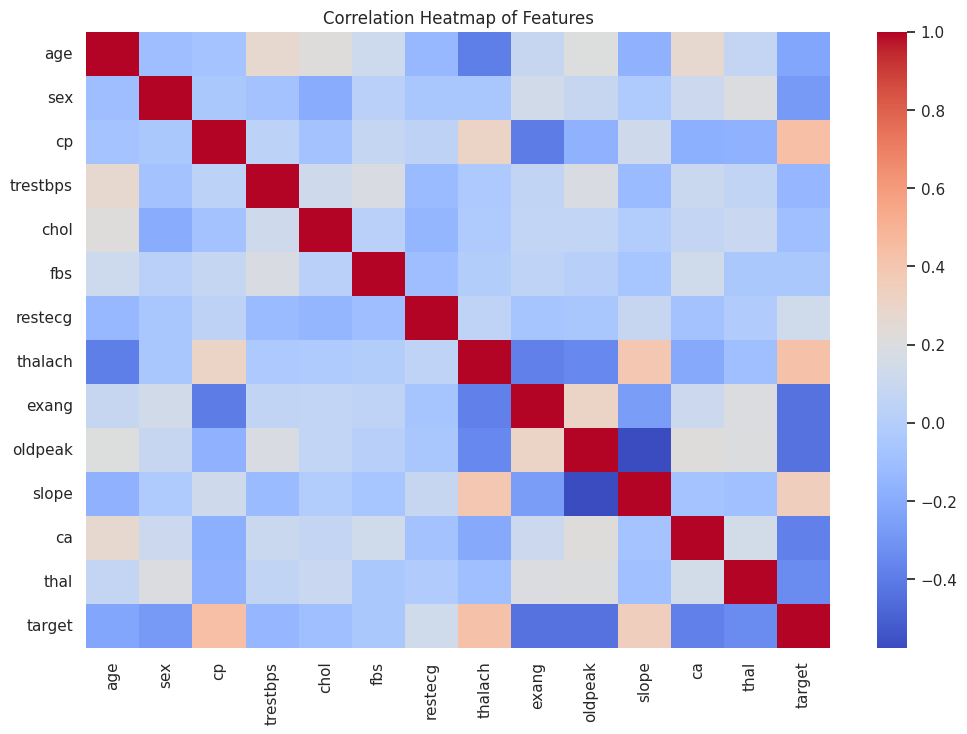

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()
#The correlation heatmap reveals that several features, especially age, maximum heart rate, and chest pain type, show notable correlation with the target variable. However, correlations are not very strong, suggesting the need for non-linear models like Random Forest.

This dataset is derived from hospital-based diagnostic records, not a general population study. Therefore, the observed trends are influenced by clinical context, patient selection bias, and test conditions, which can override the “general belief” patterns seen in broader epidemiological studies.

Because this data represents individual patient cases, each patient’s values are shaped by unique medical history, treatment, and severity of symptoms. As a result, the graphs reflect real clinical measurements, not universal physiological rules.

So while the results may appear to contradict common assumptions, they are valid within the scope of this patient dataset, and we cannot adjust or generalize them beyond this context.

#Model Training

1. Logistic Regression (Baseline)

In [61]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, lr.predict(X_test))*100)


Logistic Regression Accuracy: 79.51219512195122


2. Random Forest

In [53]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)


rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9853658536585366

Confusion Matrix:
 [[102   0]
 [  3 100]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



3. predicting heart disease

In [55]:
prob = rf.predict_proba(new_patient)

print(f"Heart Disease Risk: {prob[0][1]*100:.2f}%")


Heart Disease Risk: 97.00%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


4. Feature importance

In [58]:
import pandas as pd

importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(importance)
#Chest pain type and maximum heart rate were the most influential features.

     Feature  Importance
2         cp    0.135072
11        ca    0.127327
7    thalach    0.122169
9    oldpeak    0.121905
12      thal    0.110518
0        age    0.077908
4       chol    0.074822
3   trestbps    0.071171
8      exang    0.057594
10     slope    0.045782
1        sex    0.028731
6    restecg    0.018557
5        fbs    0.008444


#Cross Validation

In [59]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, cv=5)
print("Mean Accuracy:", scores.mean()*100)


Mean Accuracy: 99.70731707317073


as you can see Random Forest outperformed Logistic Regression3

# doing more with it

In [69]:
# saving the model
import joblib

joblib.dump(rf, "heart_disease_rf.pkl")
rf = joblib.load("heart_disease_rf.pkl")
import joblib

joblib.dump(rf, "heart_model.pkl")
print("Model saved!")



Model saved!


In [70]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np

model = joblib.load("heart_model.pkl")

st.title("❤️ Heart Disease Prediction")

age = st.number_input("Age", 1, 120, 50)
sex = st.selectbox("Sex (1=Male, 0=Female)", [1, 0])
cp = st.selectbox("Chest Pain Type", [0, 1, 2, 3])
trestbps = st.number_input("Resting BP", 80, 200, 120)
chol = st.number_input("Cholesterol", 100, 600, 200)
fbs = st.selectbox("Fasting Blood Sugar > 120", [1, 0])
restecg = st.selectbox("Rest ECG", [0, 1, 2])
thalach = st.number_input("Max Heart Rate", 60, 220, 150)
exang = st.selectbox("Exercise Angina", [1, 0])
oldpeak = st.number_input("Oldpeak", 0.0, 6.0, 1.0)
slope = st.selectbox("Slope", [0, 1, 2])
ca = st.selectbox("Vessels", [0, 1, 2, 3, 4])
thal = st.selectbox("Thal", [1, 2, 3])

if st.button("Predict"):
    patient = np.array([[age, sex, cp, trestbps, chol, fbs,
                          restecg, thalach, exang, oldpeak,
                          slope, ca, thal]])
    pred = model.predict(patient)[0]
    prob = model.predict_proba(patient)[0][1] * 100

    if pred == 1:
        st.error(f"High Risk ({prob:.2f}%)")
    else:
        st.success(f"Low Risk ({prob:.2f}%)")


Overwriting app.py


In [71]:
%%writefile requirements.txt
streamlit
scikit-learn
numpy
joblib
pandas


Writing requirements.txt


Deployed an app where you can put in data manually and understand the risk of heart disease

[Click here](https://heart-disease-data.streamlit.app/)